# Mô hình và biểu đồ



##3.1 Cài thư viện và tập dữ liệu

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
from statistics import *

In [ ]:
import os
 # sử dung thư viện để mount drive
from google.colab import drive
 # mount google drive
drive.mount('/content/drive/')
os.chdir('./drive/MyDrive/CThongke/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('./uscities.csv') # đọc dữ liệu

### Tổng quan về dữ liệu

In [ ]:
df.shape

(28338, 17)

In [ ]:
df.columns

Index(['city', 'city_ascii', 'state_id', 'state_name', 'county_fips',
       'county_name', 'lat', 'lng', 'population', 'density', 'source',
       'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28338 entries, 0 to 28337
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          28338 non-null  object 
 1   city_ascii    28338 non-null  object 
 2   state_id      28338 non-null  object 
 3   state_name    28338 non-null  object 
 4   county_fips   28338 non-null  int64  
 5   county_name   28338 non-null  object 
 6   lat           28338 non-null  float64
 7   lng           28338 non-null  float64
 8   population    28338 non-null  int64  
 9   density       28338 non-null  int64  
 10  source        28338 non-null  object 
 11  military      28338 non-null  bool   
 12  incorporated  28338 non-null  bool   
 13  timezone      28338 non-null  object 
 14  ranking       28338 non-null  int64  
 15  zips          28337 non-null  object 
 16  id            28338 non-null  int64  
dtypes: bool(2), float64(2), int64(5), object(8)
memory usage: 3.3+ MB


In [ ]:
df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [ ]:
df.describe()

,county_fips,lat,lng,population,density,ranking,id
count,28338.000000,28338.000000,28338.000000,2.833800e+04,28338.000000,28338.000000,2.833800e+04
mean,29834.354224,38.613995,-92.972393,1.426071e+04,515.410615,2.945938,1.838216e+09
std,15845.095836,5.870832,15.596099,1.898112e+05,786.011155,0.233816,1.936183e+07
min,1001.000000,17.955900,-176.629500,1.000000e+00,0.000000,1.000000,1.630024e+09
25%,17179.000000,35.126875,-98.193975,3.300000e+02,117.000000,3.000000,1.840008e+09
50%,29205.000000,39.314800,-90.250100,1.089000e+03,297.000000,3.000000,1.840015e+09
75%,42043.000000,41.743725,-81.933650,4.485500e+03,603.000000,3.000000,1.840022e+09
max,72153.000000,71.272800,173.123000,1.871322e+07,34277.000000,3.000000,1.840153e+09


## 3.2 Thống kê dân số

### Kiểm tra dữ liệu

In [ ]:
df.isna().sum()

city            0
city_ascii      0
state_id        0
state_name      0
county_fips     0
county_name     0
lat             0
lng             0
population      0
density         0
source          0
military        0
incorporated    0
timezone        0
ranking         0
zips            1
id              0
dtype: int64

#### Nhận xét:
- Kiểm tra giá trị thì thấy biến “zips” bị thiếu giá trị
- Biến “zips” có 1 giá trị bị thiếu.
- Với biến "zips" biểu thị cho mã bưu điện nên không ảnh hưởng đến thống kê

In [ ]:
df['zips'].replace([np.nan], df['zips'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

city            0
city_ascii      0
state_id        0
state_name      0
county_fips     0
county_name     0
lat             0
lng             0
population      0
density         0
source          0
military        0
incorporated    0
timezone        0
ranking         0
zips            0
id              0
dtype: int64

### Chọn biến dân số và mật độ dân số để xem xét tần suất dân số và mật độ dân số tại các thành phố ở Mỹ

In [ ]:
population=df.population

In [ ]:
density=df.density

#### Biểu đồ tần suất

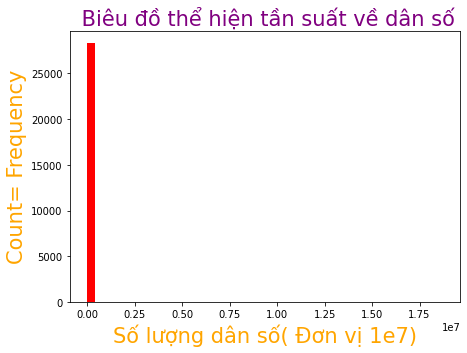

In [ ]:
plt.figure( figsize=[ 7,5])
ax1= plt.subplot2grid( shape =(1, 1), loc =( 0, 0), rowspan= 1, colspan= 1)
hist= ax1.hist( population, bins= 50, color="red")
ax1.set_title(' Biêu đồ thể hiện tần suất về dân số', fontsize=21, color="purple")
ax1.set_xlabel('Số lượng dân số( Đơn vị 1e7)',fontsize=21, color="orange")
ax1.set_ylabel('Count= Frequency', fontsize=21, color="orange")
plt.show()

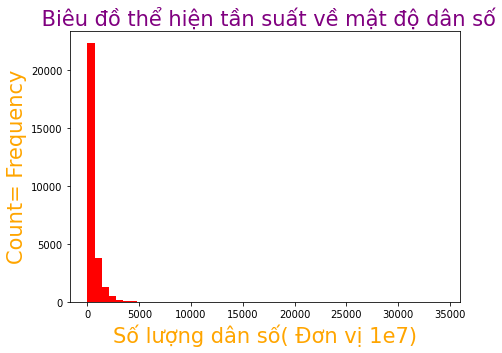

In [ ]:
plt.figure( figsize=[ 7,5])
ax1= plt.subplot2grid( shape =(1, 1), loc =( 0, 0), rowspan= 1, colspan= 1)
hist= ax1.hist(density, bins= 50, color="red")
ax1.set_title(' Biêu đồ thể hiện tần suất về mật độ dân số', fontsize=21, color="purple")
ax1.set_xlabel('Số lượng dân số( Đơn vị 1e7)',fontsize=21, color="orange")
ax1.set_ylabel('Count= Frequency', fontsize=21, color="orange")
plt.show()

#### Biểu đồ Histogram về dân số và mật độ dân số

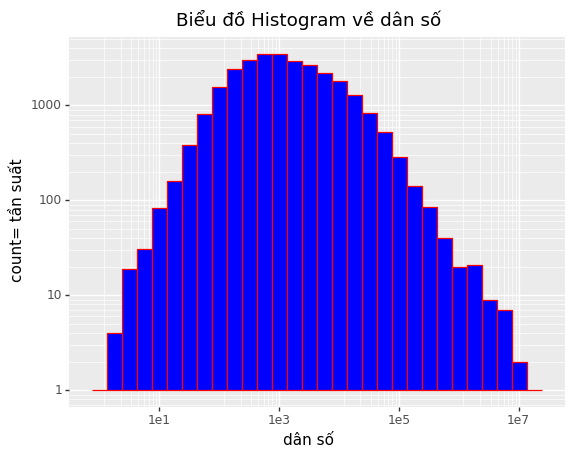

<ggplot: (8778790179221)>

In [ ]:
ggplot(df, aes(x='population')) + geom_histogram(bins=30, color='red', fill='blue')+ scale_x_log10()+scale_y_log10() + ggtitle('Biểu đồ Histogram về dân số')+ ylab('count= tần suất')+ xlab('dân số')

In [ ]:
population.describe()

count    2.833800e+04
mean     1.426071e+04
std      1.898112e+05
min      1.000000e+00
25%      3.300000e+02
50%      1.089000e+03
75%      4.485500e+03
max      1.871322e+07
Name: population, dtype: float64

In [ ]:
#Khoảng biến thiên
max(population)-min(population)

18713219

In [ ]:
# Độ lệch chuẩn
stdev(population)

189811.2169898949

In [ ]:
# Phương sai
variance(population)

36028298095.18496

- Tứ phân vị thứ nhất: 25% dân số không vượt quá 3.300000e+02
- Tứ phân vị thứ hai:  50% dân số không vượt quá 1.089000e+03
- Tứ phân vị thứ ba:   75% dân số không vượt quá 4.485500e+03
- Giá trị trung bình của dân số là: 1.426071e+04
- Khoảng biến thiên: 18713219
- Độ lệch chuẩn: 189811.2169898949
- Phương sai: 36028298095.18496

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 99 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


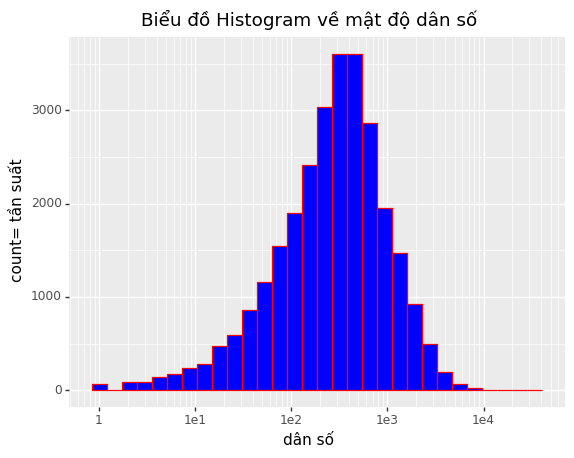

<ggplot: (8778789714037)>

In [ ]:
ggplot(df, aes(x='density')) + geom_histogram(bins=30, color='red', fill='blue')+ scale_x_log10() + ggtitle('Biểu đồ Histogram về mật độ dân số')+ ylab('count= tần suất')+ xlab('dân số')

In [ ]:
density.describe()

count    28338.000000
mean       515.410615
std        786.011155
min          0.000000
25%        117.000000
50%        297.000000
75%        603.000000
max      34277.000000
Name: density, dtype: float64

In [ ]:
# Khoảng biến thiên
max(density)-min(density)

34277

In [ ]:
# Độ lệch chuẩn
stdev(density)

786.0111546983726

In [ ]:
# Phương sai
variance(density)

617813.535310269

- Tứ phân vị thứ nhất: 25% mật độ dân số không vượt quá 117.000000
- Tứ phân vị thứ hai:  50% mật độ dân số không vượt quá 297.000000
- Tứ phân vị thứ ba:   75% mật độ dân số không vượt quá 603.000000
- Giá trị trung bình của mật độ dân số là: 515.410615
- Khoảng biến thiên: 34277
- Độ lêch chuẩn: 786.0111546983726
- Phương sai: 617813.535310269

#### Biểu đồ hộp & râu


Text(0.5, 1.0, ' Biêu đồ hộp và râu cho dân số')

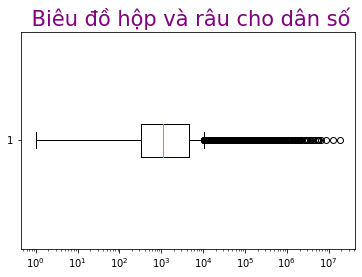

In [ ]:
plt.boxplot(population, vert= False)
plt.xscale('log')
plt.title(' Biêu đồ hộp và râu cho dân số', fontsize=21, color="purple")

Text(0.5, 1.0, ' Biêu đồ hộp và râu cho mật độ dân số')

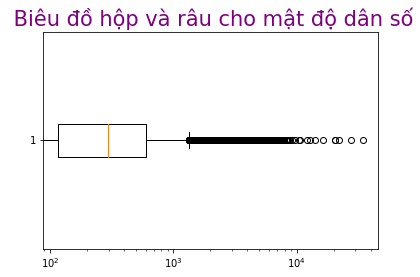

In [ ]:
plt.boxplot(density, vert= False)
plt.xscale('log')
plt.title(' Biêu đồ hộp và râu cho mật độ dân số', fontsize=21, color="purple")

#### Nhận xét:
- Biểu đồ thứ nhất và hai về số lượng dân số tần suất khá lớn trong một khoảng giá trị và nó tập trung về một phía nên chưa thể thấy số lượng dân số thay đổi như nào.
- Biểu đồ thứ 3 và 4 ta rút gọn giá trị (dùng log10) chuyển về phân phối chuẩn trong khoảng dao động có thể thấy dân số tập trung hầu hết ở khoảng: 500- 1200 và mật độ dân số tập trung hầu hết ở khoảng: 400- 500
- Biểu đồ Hộp và râu có thể thấy biểu đồ lệch phải, phân phối dữ liệu tập trung chủ yếu phía trên trái, có rất nhiều giá trị ngoại biên.

#### Nguyên nhân:
- Người dân cư Hoa Kì chủ yếu sống trong một số các thành phố lớn phát triển như trong khu vực Đông Bắc, khu vực phía Nam và ven bờ Thái Bình Dương
- Các TP/ thị trấn chiếm đa số đều ở vùng núi và cao nguyên nằm sâu trong lục địa, điều kiện khí hậu, giao thông khó khăn nên dân cư thưa thớt, mật độ dân số thấp.

#### Ứng dụng:
- Có cái nhìn cụ thể hơn về tình hình phân bố dân cư trong các TP/ thị trấn của Hoa Kỳ


### dân số theo Ranking

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf8cf78890>]],
      dtype=object)

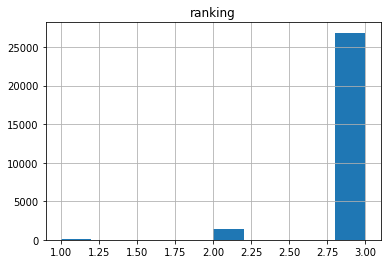

In [ ]:
df.hist('ranking',)


- Đa phần các TP/ thị trấn có Rank= 3

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


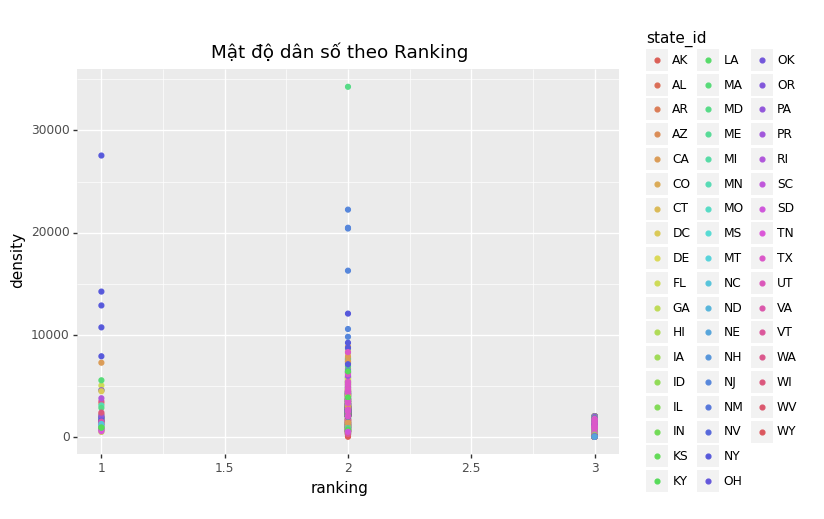

<ggplot: (8757124808885)>

In [ ]:
from plotnine import *
ggplot(df) +aes(x='ranking', y='density',color='state_id') + geom_point()+ ggtitle('Mật độ dân số theo Ranking')+theme(figure_size=(7,5))

Hệ số tương quan giữa mật độ dân số với ranking

In [ ]:
df['density'].corr(df['ranking'])

-0.6357199138875402

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


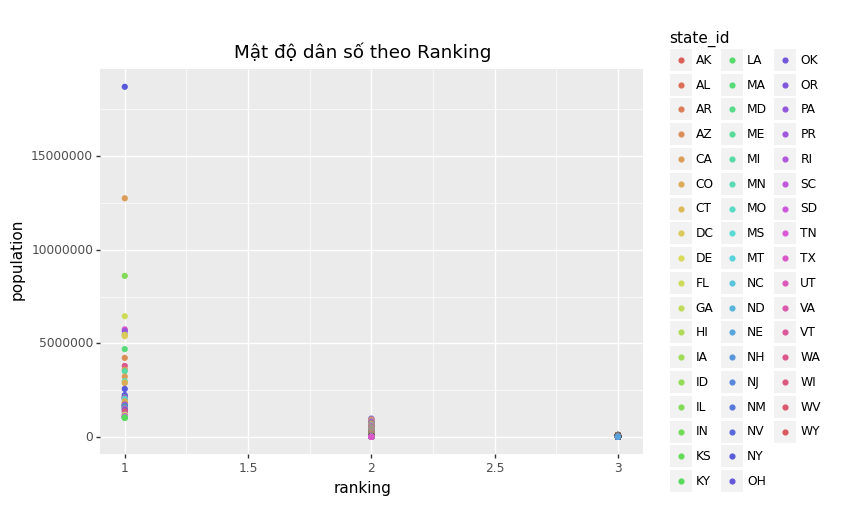

<ggplot: (8757109545997)>

In [ ]:
from plotnine import *
ggplot(df) +aes(x='ranking', y='population',color='state_id') + geom_point()+ ggtitle('Mật độ dân số theo Ranking')+theme(figure_size=(7,5))

Hệ số tương quan giữa dân số với ranking

In [ ]:
df['population'].corr(df['ranking'])

-0.32797716352722034

#### Nhận xét:
- Những nơi có vị trí vàng: có địa hình, khí hậu, giàu tài nguyên phù hợp cho con người sinh sống và nền kinh tê phát triển nên thuận lợi cho sự sinh sống và phát triên của dân cư=> đông dân cư và có mật độ dân số cao.
- Những TP này đa phần đều có xếp hạng mức độ quan trọng cao với Ranking<= 2.
- Những TP dân số và mật độ dân số rất thấp đa phần xếp hạng thấp với Ranking= 3.
-  Hệ số tương quan của ranking với mật độ dân số= -0.6357199138875402, và với dân số= -0.32797716352722034 <0 có nghĩa là với các TP/ thị trấn có dân số hay mật độ dân số càng cao thì số ranking giảm( hay mức độ quan trọng của TP/ thị trấn đó càng cao)

### dân số trong các tiểu bang

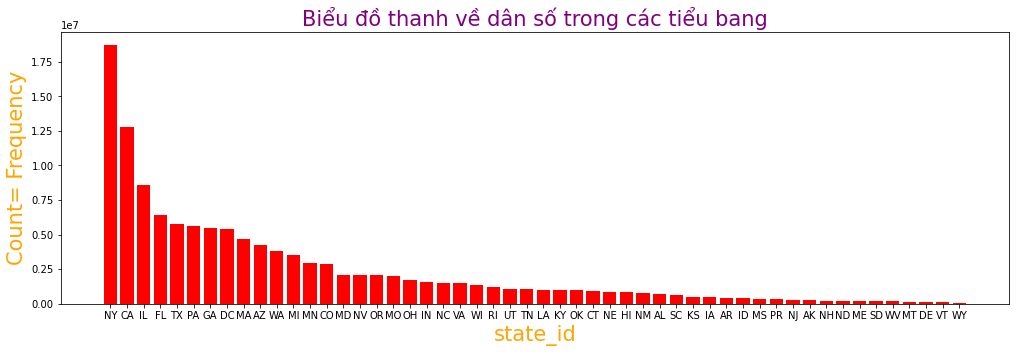

In [ ]:
plt.figure( figsize=[ 17, 5])
ax1= plt.subplot2grid( shape =(1, 1), loc =( 0, 0), rowspan= 1, colspan= 1)
ax1=ax1.bar(df.state_id, df.population, color='red')
plt.title('Biểu đồ thanh về dân số trong các tiểu bang', fontsize=21, color='purple')
plt.xlabel('state_id',fontsize=21, color='orange')
plt.ylabel('Count= Frequency', fontsize=21, color='orange')

plt.show()

In [ ]:
a= df.value_counts('population').where('')

#### Nhận xét:
- Ta thấy phân bố dân cư ở các tiểu bang là không đều và tập trung ở NewYork lên tới 1.75e7 và California là 1.3e7

#### Nguyên nhân:
- Các tiểu bang tập trung đông dân cư do có vị thế xã hội và nền kinh tế có lịch sử phát triển tế rất lâu đời:
 - New York: đây chính là trung tâm toàn cầu về thương mại và quốc tế. Rất nhiều các hãng công nghiệp hàng đầu tại Mỹ và trên thế giới đặt trụ sở tại đây.
 - California: Nếu như chúng ta coi bang này là một quốc gia độc lập thì nền kinh tế của nó được xếp vào hạng lớn và mạnh thứ 6 trên thế giới. Đây là nơi có điều kiện khí hậu tự nhiên đa dạng, sinh động. Hơn thế nữa, vùng đất này còn có rất nhiều phong cảnh thiên nhiên đẹp, là trung tâm kinh tế của cả nước Mỹ.

